# Black Friday | _Drawing Conclusions from Data Analysis_

From: https://www.kaggle.com/mehdidag/black-friday

This dataset contains entries for purchases made during Black Friday for a specific retail store. It has features related to the customer (age, gender, occupation, etc.) as well as the product. The **Purchase** feature alludes to the amount of money spent on that transaction, it is not the price of the product.

***

# SECTION 1: Data

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***

# Import Data

Let's import the data into a Pandas dataframe and check out some of its broader aspects to see what we're working with.

In [9]:
sales = pd.read_csv('BlackFriday.csv')
sales.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


***

# Exploratory Analysis & Feature Engineering

## 1. Missing Values



In [12]:
total_miss = sales.isnull().sum()
perc_miss = total_miss/sales.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000


Since most products will belong to only one category, it makes sense for less products to have a second category, let alone a third one.

***

## 2. Unique Values

Lets now explore unique values in some of the features. Remember there is a total of **537577** entries:

In [14]:
# Info about products
print('Number of products:',sales['Product_ID'].nunique())
print('Number of categories:',sales['Product_Category_1'].unique().max())
print('Highest and lowest purchase:',
      sales['Purchase'].max(),',',sales['Purchase'].min())

Number of products: 3623
Number of categories: 18
Highest and lowest purchase: 23961 , 185


In [15]:
# Info about shoppers
print('Number of shoppers:',sales['User_ID'].nunique())
print('Years in city:',sales['Stay_In_Current_City_Years'].unique())
print('Age Groups:',sales['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


***

## 3. Gender
Lets first find whether the data is uniformly distributed by gender by looking at how many entries belong to each one:

In [16]:
count_m = sales[sales['Gender']=='M'].count()[0]
count_f = sales[sales['Gender']=='F'].count()[0]

In [17]:
print('Number of male clients:',count_m)
print('Number of female clients:',count_f)

Number of male clients: 405380
Number of female clients: 132197


We can see that the number of male clients recorded exceeds the number of female clients recorded by almost 4 times. For this reason, it will be much more informational to analyze **Gender** by using ratios instead of counting each entry. Lets see how much each gender spent in regards to eachself:

In [18]:
print('Female Purchases:',round(sales[sales['Gender']=='F']['Purchase'].sum()/count_f,3))
print('Male Purchases:',round(sales[sales['Gender']=='M']['Purchase'].sum()/count_m,3))

Female Purchases: 8809.761
Male Purchases: 9504.772


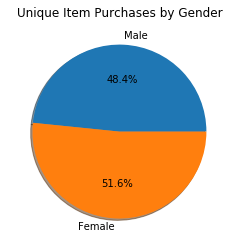

In [42]:
plt.pie(sales.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%')
plt.title('Unique Item Purchases by Gender')
plt.show()

Although almost even, women did purchase a slightly wider array of products than men did. Now, lets analyze the proportions of each gender's purchase in terms of the product categories:

In [20]:
# Individual groupby dataframes for each gender
gb_gender_m = sales[sales['Gender']=='M'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
gb_gender_f = sales[sales['Gender']=='F'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()

# Concatenate and change column names
cat_bygender = pd.concat([gb_gender_m,gb_gender_f],axis=1)
cat_bygender.columns = ['M ratio','F ratio']

# Adjust to reflect ratios
cat_bygender['M ratio'] = cat_bygender['M ratio']/sales[sales['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/sales[sales['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']

In [21]:
cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001248,0.000461,2.705079,0.001710
18,0.006658,0.002844,2.340854,0.009502
15,0.012778,0.007738,1.651252,0.020517
9,0.000824,0.000530,1.555993,0.001353
1,0.281099,0.184581,1.522908,0.465680
11,0.047612,0.035243,1.350972,0.082855
6,0.038702,0.033851,1.143303,0.072553
10,0.009606,0.008608,1.115868,0.018214
2,0.044220,0.042157,1.048947,0.086377


This table tells us a lot about how likely a type of product is to be bought in regards of gender. For instance, men are almost 3 times as likely to buy an item in category 17, while women are almost 2 times as likely to buy a product in category 14.

***

## 4. Age
Since as of now, **Age** values are strings, lets encode each group so they can be represented with an integer value which a machine learning algorithm can understand:

In [22]:
# Encoding the age groups
sales['Age_Encoded'] = sales['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})


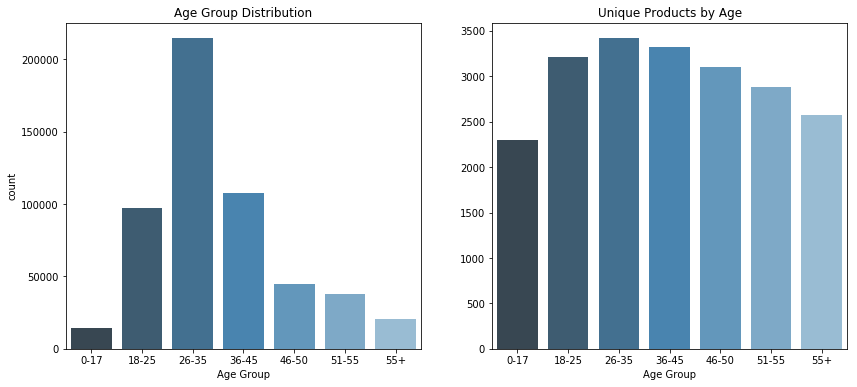

In [23]:
prod_byage = sales.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(sales['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

It's quite apparent that the largest age group amongst the customers is 26-35. Interestingly, the distribution of product purchase, in terms of quantity, does not vary greatly amongst the age groups. This means that, though the 26-35 age group is the most popular, the other age groups purchase almost as many unique items as them. But does this mean that the amount of money spent amongst the age groups is the same? Let's see...

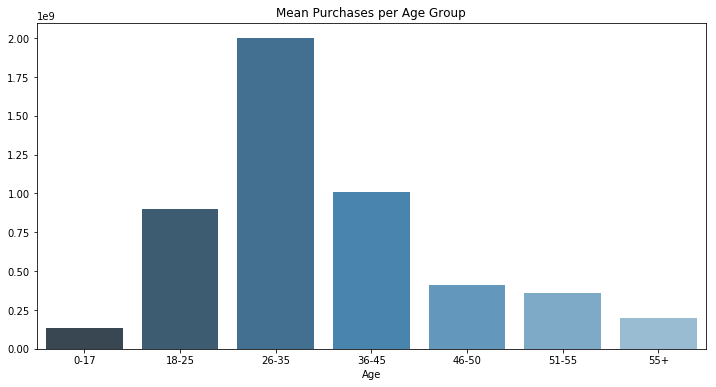

In [24]:
spent_byage = sales.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Mean Purchases per Age Group')
plt.show()

Our data clearly shows that the amount of money made from each age group correlates proportionally with the amount of customers within the age groups. This can be valuable information for the store, as it might want to add more products geared towards this age group in the future, or perhaps work on marketing different items to increase a broader diversity in the age groups of their customers.

***

## 5. Occupation

This sections draws some insights on our data in terms of the occupation of the customers.

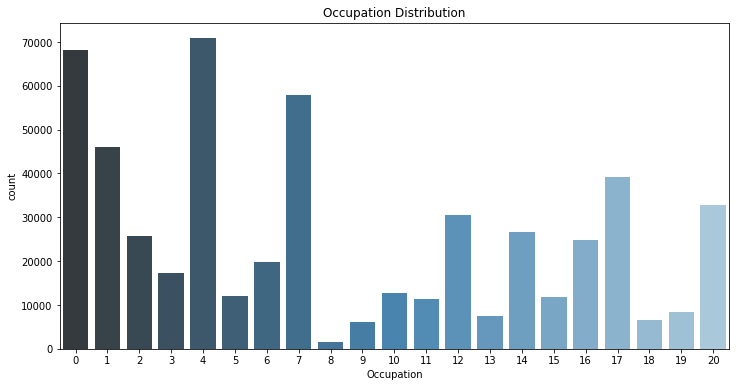

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(sales['Occupation'],palette="Blues_d")
plt.title('Occupation Distribution')
plt.show()

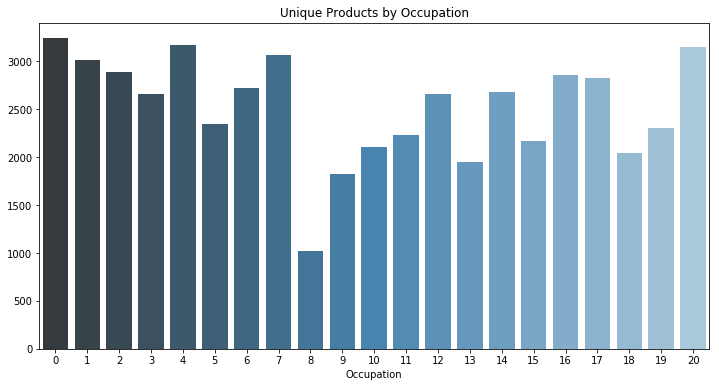

In [33]:
plt.figure(figsize=(12,6))
prod_by_occ = sales.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values,palette="Blues_d")
plt.title('Unique Products by Occupation')
plt.show()

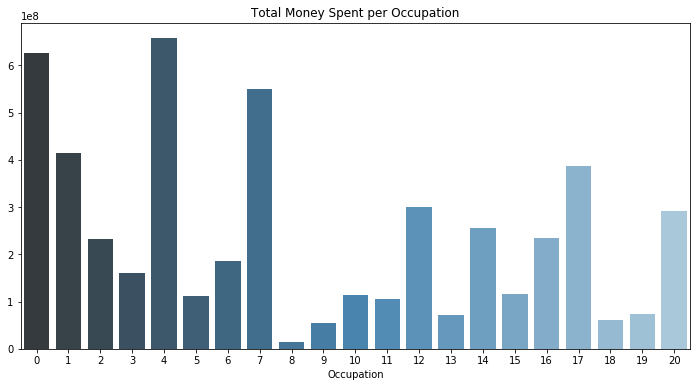

In [31]:
spent_by_occ = sales.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values,palette="Blues_d")
plt.title('Total Money Spent per Occupation')
plt.show()

Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation. This is fortunate from a data science perspective, as we are not working with odd or outstanding features. Our data, in terms of age and occupation seems to simply make sense.

***

## 6. Products

Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

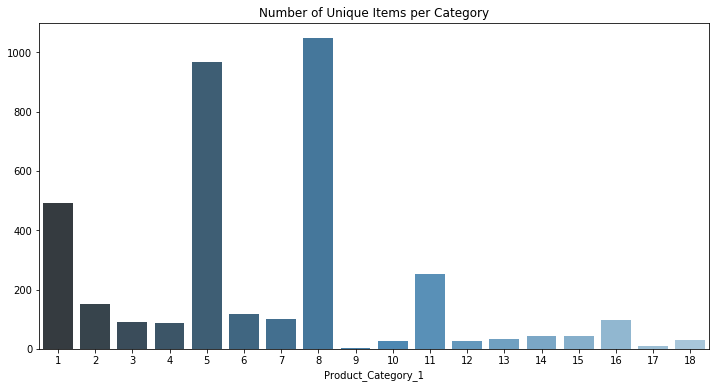

In [34]:
plt.figure(figsize=(12,6))
prod_by_cat = sales.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

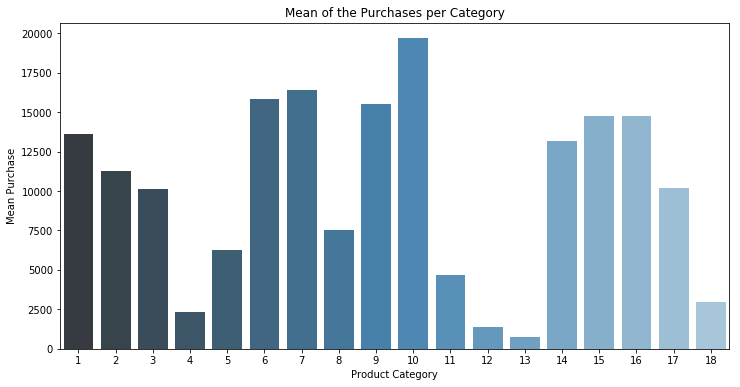

In [36]:
category = []
mean_purchase = []


for i in sales['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(sales[sales['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase,palette="Blues_d")
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

Interestingly enough, our most popular categories are not the ones making the most money. This appears to be a big store, and they may be aware of this. Yet this same form of analysis can be used in the case of a smaller store that might not be aware, and it could be very useful.

## 7. Estimate of price and quantity of purchase
</font>

Since the **Purchases** feature alludes to how much a customer paid for an unknown amount of a certain item, let's make a bold assumption that the lowest purchase paid by product is the price of said item:

In [37]:
# Dictionary of product IDs with minimum purchase
prod_prices = sales.groupby('Product_ID').min()['Purchase'].to_dict()

Now, the purchase value for each item ID is grouped by what one could asume is the amount of items purchased. Then, the prices and quantities calculated below are an estimate, but it is a very good one:

In [38]:
def find_price(row):
    prod = row['Product_ID']
    
    return prod_prices[prod]

In [39]:
sales['Price'] = sales.apply(find_price,axis=1)

In [40]:
sales['Amount'] = round(sales['Purchase']/sales['Price']).astype(int)

In [41]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Price,Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0,2648,3
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,3880,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0,346,4
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0,365,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,6,3920,2


***

### Work In Progress...